****Принятие решений в бизнесе на основе данных 
"Проверка гипотез по увеличению выручки в интернет-магазине — оценика результатов A/B теста"****

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

**Часть 1. Приоритизация гипотез.**

Задача:

    - Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
    - Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
    - Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
pd.options.display.max_colwidth = 120
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
data.duplicated().sum()

0

<div class="alert alert-block alert-info">

Пропусков нет, дублей нет.

</div>

In [5]:
data['ICE'] = data['Impact'] * data['Confidence'] / data['Efforts'] 
data[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспективные гипотезы по ICE: 8, 0, 7.

In [6]:
data['RICE'] = data['Reach'] * data['Impact'] * data['Confidence'] / data['Efforts']
data[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы по RICE: 7, 2, 0, 6. Здесь на первом месте гипотеза 7, так получилось, потому что её параметр Reach равен 10, в то время как у других гипотез он меньше.

<div class="alert alert-block alert-info">

    Таблица с гипотезами полностью корректна, здесь ничего не меняли.
    По моему мнению, выбор нужной гипотезы очень индивидуальное дело, везде будет по разному и зависеть от текущих целей компании. В данном случае я бы выбрал метод RICE и соответственно топ -4 гипотезы:

* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
*Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию


</div>

**Часть 2. Анализ A/B-теста**

Задача
Проанализируйте A/B-тест:

   1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
   2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
   3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
   4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
   5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
   6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
   7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
   8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
   9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
   10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
   11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
   12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
   13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
   14. Примите решение по результатам теста и объясните его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

In [7]:
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [8]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
orders.duplicated().sum()

0

In [11]:
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


<div class="alert alert-block alert-info">

Пропусков нет, дублей нет.

</div>

In [12]:
#Поменяем тип столбца "date" на datetime
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [13]:
orders["date"].describe()

/tmp/ipykernel_48/4220411559.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders["date"].describe()


count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [14]:
orders.groupby('group')['visitorId'].nunique()

group
A    503
B    586
Name: visitorId, dtype: int64

In [15]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [16]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [17]:
orders.duplicated().sum()

0

<div class="alert alert-block alert-info">

Пропусков нет, дублей нет.

</div>

In [18]:
visitors.describe()

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [19]:
#Поменяем тип столбца "visitors" на datetime
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [20]:
visitors["date"].describe()

/tmp/ipykernel_48/164514240.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  visitors["date"].describe()


count                      62
unique                     31
top       2019-08-27 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [21]:
visitors['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

In [22]:
#Проверим группы на совпадения пользователей
g_a = orders[orders['group'] == 'A']['visitorId']
g_b = orders[orders['group'] == 'B']['visitorId']
orders_ab = orders.query('visitorId in @g_a and visitorId in @g_b')
display(orders_ab['visitorId'].unique())
print('Количество пользователей в двух группах:', orders_ab['visitorId'].nunique())
print('Всего пользователей в тесте:', orders['visitorId'].nunique())

array([4069496402,  963407295,  351125977, 3234906277,  199603092,
        237748145, 3803269165, 2038680547, 2378935119, 4256040402,
       2712142231,    8300375,  276558944,  457167155, 3062433592,
       1738359350, 2458001652, 2716752286, 3891541246, 1648269707,
       3656415546, 2686716486, 2954449915, 2927087541, 2579882178,
       3957174400, 2780786433, 3984495233,  818047933, 1668030113,
       3717692402, 2044997962, 1959144690, 1294878855, 1404934699,
       2587333274, 3202540741, 1333886533, 2600415354, 3951559397,
        393266494, 3972127743, 4120364173, 4266935830, 1230306981,
       1614305549,  477780734, 1602967004, 1801183820, 4186807279,
       3766097110, 3941795274,  471551937, 1316129916,  232979603,
       2654030115, 3963646447, 2949041841])

Количество пользователей в двух группах: 58
Всего пользователей в тесте: 1031


<div class="alert alert-block alert-info">

 Всего в таблице 1031 пользоватей. Из них 58 пользователей одновременно присутствуют в двух группах. Их доля составляют 5,6% от общего числа.
Так как их процент от общего числа не велик, очистим таблицу от этих пользователей, для корретного А/В теста.

</div>

In [23]:
orders = orders.query('visitorId not in @orders_ab["visitorId"]')
print('Всего пользователей в тесте осталось:', orders['visitorId'].nunique())

Всего пользователей в тесте осталось: 973


<div class="alert alert-block alert-info">

 В таблицах с заказами и посетителями изменили тип столбца с датой. Период данных 01.08.2019 - 31.08.2019, в таблицах заказов и посетителей совпадают. Очистили таблицу от пользователей, которые были в двух группах одновременно. Всё готово к анализу

</div>

In [24]:
datesGroups = orders[['date', 'group']].drop_duplicates()

In [25]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [26]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [27]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

In [28]:
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

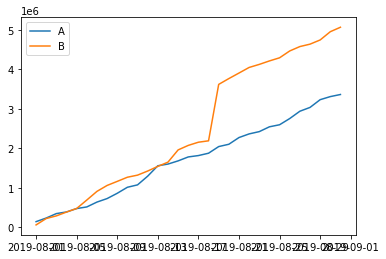

In [29]:
#график кумулятивной выручки по группам
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend() 

В середине теста сегмент В вырвался вперед и продолжал лидировать весь остаток теста. Похоже, что аномально большие заказы всё-таки влияют на результат.

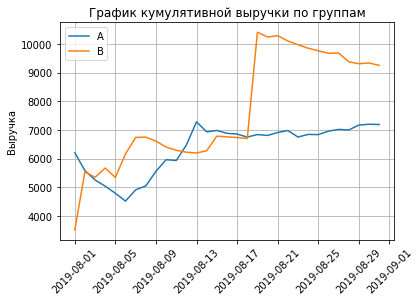

In [30]:
#график кумулятивного среднего чека по группам
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

Кумулятивное значение среднего чека колеблется. Во второй половине теста в группу В попали  крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

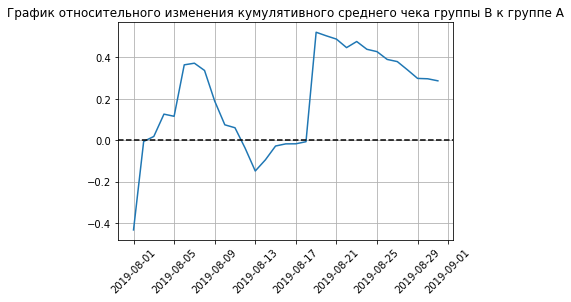

In [31]:
# график относительного изменения кумулятивного среднего чека группы B к группе A
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Результаты теста значительно и резко менялись в несколько дат. Видимо, именно тогда были совершенны аномальные заказы.

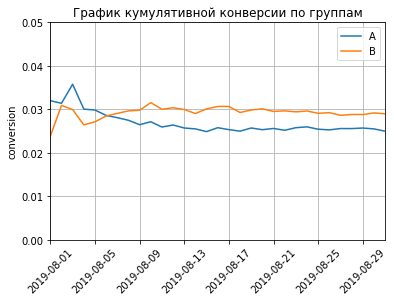

In [32]:
#график кумулятивного среднего количества заказов на посетителя по группам
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0, 0.05]) 
plt.title('График кумулятивной конверсии по группам')
plt.ylabel('сonversion')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

Получился симметричный график. Группы колебались около одного значения, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

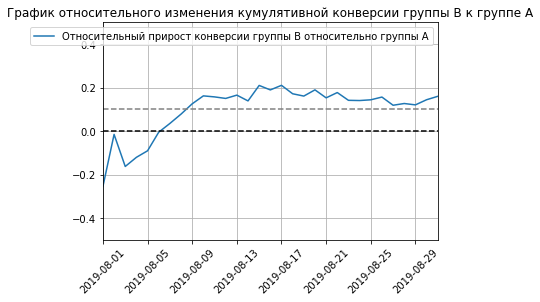

In [33]:
# график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5]) 
plt.legend()
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xticks(rotation=45)
plt.grid()
plt.show()

<div class="alert alert-block alert-info">

 Группа В лидирует по конверсии. Число заказов группы B было выше более чем на 10%

</div>

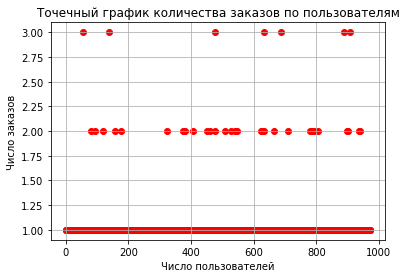

In [34]:
#точечный график количества заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'transactionId']

ordersByUsers.sort_values(by='transactionId', ascending=False).head(10)
x_values = pd.Series(range(0,len(ordersByUsers['transactionId'])))
plt.title('Точечный график количества заказов по пользователям')
plt.scatter(x_values, ordersByUsers['transactionId'], color='red')
plt.xlabel('Число пользователей')
plt.ylabel('Число заказов')
plt.grid()
plt.show()

По графику видно, что большая часть людей совершает покупку один раз.

In [35]:
#95-й и 99-й перцентили количества заказов на пользователя.
np.percentile(ordersByUsers['transactionId'], [95, 99])

array([1., 2.])

Не более 5% пользовтелей совершали совершали больше 2-х заказов и не более 1% пользователей - больше 4-х заказов.

In [36]:
#посмотрим максимальное значение числа покупок:
ordersByUsers['transactionId'].max()

3

In [37]:
#посмотрим, сколько покупателей, выходящих за 99 процентиль, т.е. являющимися выбросами:
len(ordersByUsers[ordersByUsers['transactionId'] >= 4]['visitorId'])

0

In [38]:
#добавим аномальные значения в список, они понадобятся нам дальше для дальнейшего исследования:
outlaws = ordersByUsers[ordersByUsers['transactionId'] >= 4]['visitorId'].to_list()

Все значения за пределами 99 процентиля являются аномальными.

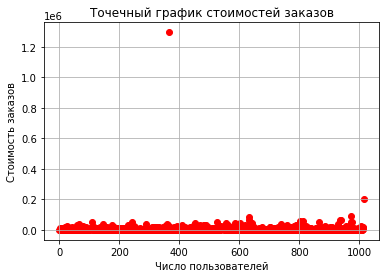

In [39]:
#точечный график стоимостей заказов
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], color='red')
plt.title('Точечный график стоимостей заказов');
plt.xlabel('Число пользователей')
plt.ylabel('Стоимость заказов')
plt.grid()
plt.show()

На графике отчетливо видно 2 выброса. Это могут быть единичные заказы, совершенные какими-то предприятиями, которые закупали товр в очень болих объемах.

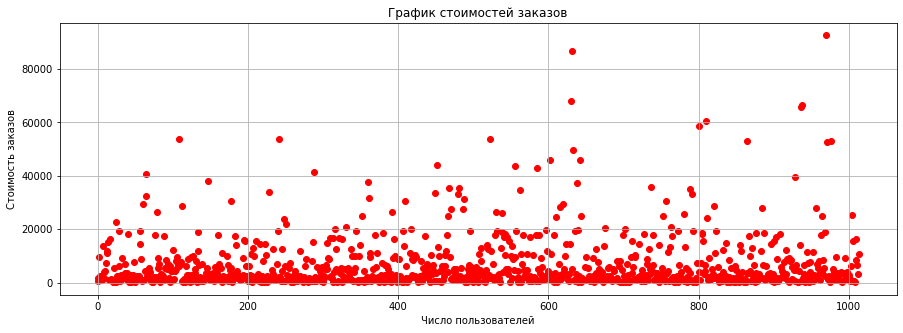

In [40]:
#Построим более наглядный график, для это уберем явные выбросы с 'revenue' большим 199000
norm_orders = orders[orders['revenue']<=195000]['revenue']
xn_values = pd.Series(range(0,len(norm_orders)))
plt.figure(figsize=(15,5))
plt.title('График стоимостей заказов');
plt.xlabel('Число пользователей')
plt.ylabel('Стоимость заказов')
plt.scatter(xn_values, norm_orders, color='red')
plt.grid()
plt.show()

<div class="alert alert-block alert-info">

 Хорошо видно тот самый аномальный заказ на 1.3 млн и еще один на 200 тысяч, остальные примерно не больше 100 тысяч.

</div>

In [41]:
# 95-й и 99-й перцентили стоимости заказов
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более чем у 5% заказов чек дороже 26 785. И не больше, чем у 1% заказов - дороже 53 904

In [42]:
#посмотрим максимальную сумму выручки заказа:
orders['revenue'].max()

1294500

In [43]:
orders['revenue'].median()

2955.0

In [44]:
#посмотрим на этот заказ:
orders[orders['revenue'] == 1294500]

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B


In [45]:
#посмотрим на историю заказов этого покупателя:
orders[orders['visitorId'] == 1920142716]

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B


Это была единоразовая крупная покупка на сумму 1 294 500, в то время как медианное значение составляет 2 978.
Все что за пределами 99 процентиля - является аномальными значениями.
Аномалиями по числу заказов являются более 4 заказов, а аномалиями по стоимости заказов единоразовые покупки в размере все, что больше 58 233,2.

In [46]:
#Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя
#между группами по «сырым» данным.
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

<div class="alert alert-block alert-info">

 Примем P-value = 0,05, так как нет необходимости в высокой точности. Сформулируем Н0 - Конверсии в группах А и Б одинаковые. Н1 - Конверсии в группах А и Б различны.
</div>

In [47]:
alpha = 0.05
stat_conver = format(stats.mannwhitneyu(sampleA, sampleB)[1])
print('{0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('p-значение:', round(float(stat_conver), 3))
if float(stat_conver) < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
      
print('Относительный конверсия группы В больше группы А на {0:.3%}'.format(sampleB.mean() / sampleA.mean() - 1)) 

0.011
p-значение: 0.011
Отвергаем нулевую гипотезу
Относительный конверсия группы В больше группы А на 15.980%


<div class="alert alert-block alert-info">

 Примем P-value = 0,05, так как нет необходимости в высокой точности. Сформулируем Н0 - Размеры средних чеков в группах А и Б одинаковые. Н1 - Размеры средних чеков в группах А и Б различны.
</div>

In [48]:
#Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
alpha = 0.05
statavercheck = format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('p-значение:', round(float(statavercheck), 3))
if float(statavercheck) < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
      
print('Относительный средний чек группы A меньше группы В на {0:.3%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.829
p-значение: 0.829
Не получилось отвергнуть нулевую гипотезу
Относительный средний чек группы A меньше группы В на 28.660%


In [49]:
#Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами 
#по «очищенным» данным. 
norm_orders = 1
norm_price = 26785
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > norm_orders]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > norm_orders]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > norm_price]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorId, dtype: int64
(86,)


86 аномальных пользователя.

In [50]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [51]:
alpha = 0.05
pv3 = format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('p-значение:', round(float(pv3), 3))
if float(pv3) < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
      
print('Относительный конверсия группы В больше группы А на {0:.3%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.016
p-значение: 0.016
Отвергаем нулевую гипотезу
Относительный конверсия группы В больше группы А на 17.393%


Н0 - Конверсии в группах А и Б одинаковые. Н1 - Конверсии в группах А и Б различны. P-value значительно меньше 0.05. Отвергнуть нулевую гипотезу, в конверсии есть различия. Конверсия группы В больше группы А на 17,393 %.

In [52]:
#Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.727
-0.034


P-value значительно больше 0.05, не получилось отвергнуть нулевую гипотезу. Средний чек в группе A равен группе B (статистическая значимость не значительна и сделать вывод о различии нельзя).
Относительное снижение среднего чека группы В к группе А примерно равен 3%. Изменение по сравнению с прошлыми результатами почти 30%.
Подтвердилась та же гипотеза.

**Решение по результатам теста.**
Остановить тест, зафиксировать победу групп В.
Конверсия из пользователя в покупателя у группы B статистически значимо выше, чем у группы A. При этом средний чек между группами не отличается.
Есть статистически значимые различия по конверсии между группами и по «сырым», и по данным после фильтрации аномалий. Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. График различия конверсии между группами сообщает, что результаты группы B лучше группы A и нет значительной тенденции к ухудшению.